# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)


## 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

[Go to Top of Notebook](#table-of-content)



## Car Prediction Model

![Are you planning to buy a new/used car  ??](http://www.usedcars-cars.com/wp-content/uploads/2018/09/small-car-lots-near-me-lovely-m-m-auto-baltimore-baltimore-md-of-small-car-lots-near-me.jpg)


>**Every Year, we see rise in gasoline,tax which directly affects the price of Cars.But still there is growth in cars industry and also rise in price**

>**With rise in Car industry, many people are buying and selling there cars.This process can be made more fluid for the customers looking to purchase or sell there cars.This prediction model can be used to get an estimate about today's Car market**

>**As we discuss about the car industry and its increasing market, We see many automobile companies are also expanding there market to other country.This prediction model can be used by this new entrant automobile to predict current cars prices of there competitors in new region**



###  How Big Is Car Industry??
* According to American Auto Council 
* Chrysler,Ford and General Motors produce nearly one and half times more of there vehicles in US.
* Have 8 times more of their global workforce in the US.
* These companies drive the overall economy of United states by generating jobs.

![Popular cars in every state](https://images.fastcompany.net/image/upload/w_596,c_limit,q_auto:best,f_auto/fc/3050536-inline-i-1-the-unofficial-state-cars-of-america.png)


![Global Cars Market ](https://image.slidesharecdn.com/statistics-131112082242-phpapp02/95/statistics-1-638.jpg?cb=1384244600)




### Is This Probelms Only In US?? :

## NO  


* In 2020,China,Japan,and Germany were the world **largest's producers** of automobiles
* Between 2015 and 2019, industry output volume climbed at a CAGR of 0.5 percent, reaching a total of 146.4 million units in 2019. (Market Research)
* Price prediction can be key player in erradicating lots of obstacle between customers and manufacturers.


## **Are there any prices issue ?**

### YES 
* There are prices issue, its not uniform all over the globe.
* If draw comparison between the prices of cars in US and India ,it cost huge in India for the same features and model.
* The Customer still finds the process to be rigid to know about the car prices , as it contains lots of hidden charges.

Click the following link to see some related Article. [Price comparison USA vs INDIA ](https://www.financialexpress.com/auto/gallery/prices-of-popular-cars-in-india-vs-us-why-and-how-much-are-we-overpaying/photos/767007/)

### Is It a Matter of concern??

* Yes, Its a matter of concern as this Auto industry is huge and provides employment to many.
* In recent stats about the cars industry we see fall in sells of cars.
* The top factors affecting the sells is **Prices**
* Price non-uniformity all over the globe,is also one of **factor** decreasing the sales.
* Manufacturers should use prediction model to revise there strategy on there prices and decreasing the gap. 
* Gasoline prices are also one of the parameter , that customers are loosing intrest.



![Fall in Sales ](https://www.team-bhp.com/?q=sites/default/files/styles/check_extra_large_for_review/public/graph_down_trend-620x388.jpg)


* [Go to Top](#table-of-content)


## 2. Libraries and Custom Functions  <a class="anchor" id="import-packages"></a>


[Go to Top of Notebook](#table-of-content)


In [129]:
import pandas as pd                                      #Importing library -Pandas, for creating Dataframe variable 
pd.set_option('display.max_columns', None)
import numpy as np                                       #Importing library -Numpy
import math
pd.options.display.float_format = '{:.2f}'.format

#Graphics
import seaborn as sns                                    #Importing library -seaborn for plotting graph
import matplotlib.pyplot as plt                          #Importing library -Matplotlib for plotting graph


#ML
from sklearn.model_selection import train_test_split     #importing Machine learning library
from sklearn.linear_model import LinearRegression        #importing linear regression model 
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
#this will be #used to evaluate the modeaccuracy
from sklearn.linear_model import LinearRegression
                                                                        
                      



>>Method is defined to calculate the regression analysis 

In [130]:
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [131]:
def train_test_metrics(X_train,X_test,y_train,y_test,model): #Defining the model for Train/test model 
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)


# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [X] [Initial Evaluation](#initial-evaluation)
- [X] [Initial Cleanup - dupes, missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers)
- [X] [Working With Categorical Values](#feature-categorical)
- [X] [Feature Transformations](#feature-transformations)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>


>[Go to Data Prep Outline](#data-prep)

>The purpose of this step is to know your data.Before putting values in Train/Test model.
There could be outliers,null data that could cause an error or wrong prediction in our analysis 


![Steps before deploying the data into Model](https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png)


In [132]:
cars = pd.read_csv('data.csv')                       #loading the data from CSV file 
                                                     #Pandas is written as pd 
cars.tail()                                          #diplaying data from bottom five rows to observe the data set 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>


![Cleaning Data , Dump Value predict Dump analysis ](https://miro.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg)

>[Go to Data Prep Outline](#data-prep)

In [133]:
cars.dtypes                                         #looking into the datasets , with columns and data set type 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [134]:
cars.isnull().sum()                     #looking for Null value in the data sets

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [135]:
cars.describe(include='all').T                #displaying measure of the dataset and transposing the dataset coloumn to row 
                                              # for better understanding of data and null values in it 
                                              # we can see lot of data in "NaN" which signify null data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.00,NaN,NaN,NaN,2010.38,7.58,1990.00,2007.00,2015.00,2016.00,2017.00
Engine Fuel Type,11911,10,regular unleaded,7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11845.00,NaN,NaN,NaN,249.39,109.19,55.00,170.00,227.00,300.00,1001.00
Engine Cylinders,11884.00,NaN,NaN,NaN,5.63,1.78,0.00,4.00,6.00,6.00,16.00
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11908.00,NaN,NaN,NaN,3.44,0.88,2.00,2.00,4.00,4.00,4.00
Market Category,8172,71,Crossover,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
cars.shape  #checking the number rows and column 


(11914, 16)

In [137]:
# Decided to drop Popularity doesnt seem it will help us in price prediction , mostly popularity ratings happen after sellling 
#the car , and its measure of customer likeness,not a price parameter
cars = cars.drop('Popularity',axis=1)


cars = cars.dropna()                    #Dropping the data that have null value 

In [138]:
cars.describe().T                      #Again displaying the data to see , if the null values are excluded 

,count,mean,std,min,25%,50%,75%,max
Year,8084.00,2012.06,6.32,1990.00,2010.00,2015.00,2016.00,2017.00
Engine HP,8084.00,274.64,115.00,55.00,192.00,264.00,320.00,1001.00
Engine Cylinders,8084.00,5.78,1.89,0.00,4.00,6.00,6.00,16.00
Number of Doors,8084.00,3.41,0.90,2.00,2.00,4.00,4.00,4.00
highway MPG,8084.00,26.65,7.72,12.00,22.00,26.00,30.00,354.00
city mpg,8084.00,19.55,7.16,7.00,16.00,18.00,22.00,137.00
MSRP,8084.00,50072.67,70293.13,2000.00,25918.75,35005.00,48722.50,2065902.00


In [139]:
cars.shape

(8084, 15)

In [140]:
cars.isnull().sum()                     #looking again for Null value in the data sets after dropping the null values 
                                        # hence we dont see any more null values

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

In [141]:
#now lets check the columns the data set contains 

In [142]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP'],
      dtype='object')

Data is colletion of information .We can receive the data from sources in numeric and categorical types .
* We have to partition the data on Numerical data types and Categorical data types
* After we differentiate the data types , we have to work on that accordingly ..we will see in following steps.

>> * Numeric data types :Data which are excat numbers ,we can also call it as quantitative data.

>> * Categorical data types :Its made up of categorical charactristics such person's hometown , in this data sets we have model,segment 

![DATA ](https://365datascience.com/wp-content/uploads/2018/10/image1-1024x576.png)

In [143]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  #Lets work on numerical variables 

cars_temp = cars.select_dtypes(include=numerics)

In [144]:
cars_temp.columns   #following columns are numerical data , now we are aware of categorical data na dnumerical data 

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'MSRP'],
      dtype='object')

In [145]:
numerical_vars=cars_temp.columns 

In [146]:
print("Shape of data Before identifying the numerical variables : ",cars.shape)

Shape of data Before identifying the numerical variables :  (8084, 15)


In [147]:
print("Shape of data after identifying the numerical variables : ",cars_temp.shape)

Shape of data after identifying the numerical variables :  (8084, 7)


> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

>> * Outliers are those observation that differ strongly or have different properties from other data points.
>> * Ensuring the outliers before putting into model is important.
>> * It prevents from wrong prediction but also ensures the quality of our data.
>> * Allow us to separate anomalies from overall trends
>>>How we should find the outliers ?:
>>> * Identify high performers
>>> * Identify Low performers 
>>> * Visualization(visualization of data is an easy method of identifying data that behave different


![Outliers](https://i.pinimg.com/736x/cb/5a/a5/cb5aa5d3d8f379853d5f0c26d687c7e5.jpg)


>[Go to Data Prep Outline](#data-prep)

In [148]:
#we have target variable as MSRP , will carry out the behaviour of MSRP with other numerical variable 

In [149]:
cars_temp['MSRP'].describe()

count      8084.00
mean      50072.67
std       70293.13
min        2000.00
25%       25918.75
50%       35005.00
75%       48722.50
max     2065902.00
Name: MSRP, dtype: float64

C:\Users\sarth\anaconda3\envs\Practise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2000.0, 2065902.0)

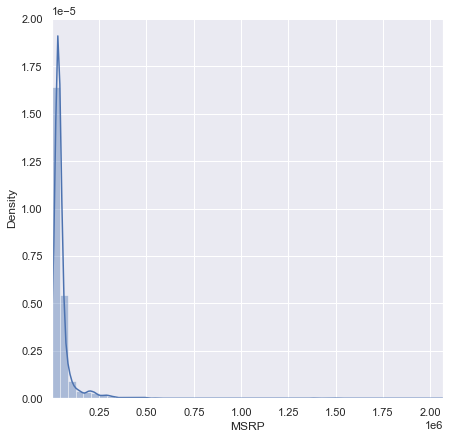

In [150]:
f ,ax=plt.subplots(figsize=(7,7))
sns.distplot(cars_temp['MSRP'])
plt.xlim([2.000000e+03,2.065902e+06])

## Data Visualization 

>Lets visualize the data , with different parameters.

>This would help us to know about the trends in data.

>Helps us to understand the relation and importance of different characteristics with MSRP(target Variable)

![Outliers](https://www.smartdatacollective.com/wp-content/uploads/2019/01/data-visualization-platforms.jpg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017')])

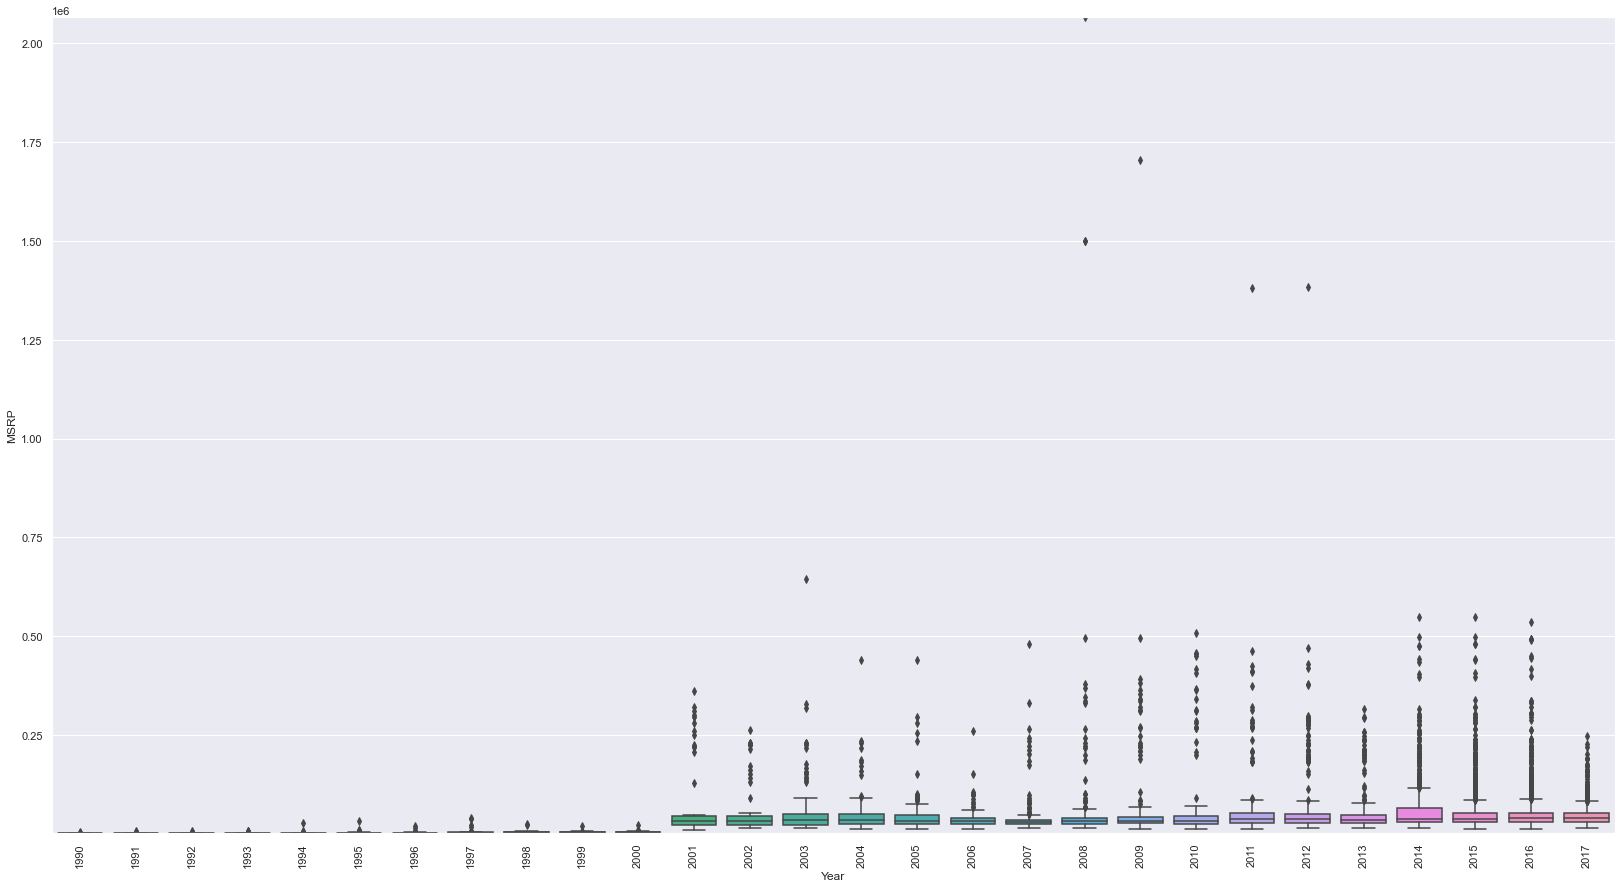

In [151]:
var_Y = 'Year'
data = pd.concat([cars_temp['MSRP'], cars[var_Y]], axis=1)    # plot between 'Year' and 'MSRP' , we get idea of price behaviour 
f, ax = plt.subplots(figsize=(28,15))                         # over the years 
fig = sns.boxplot(x=var_Y, y="MSRP", data=data)
fig.axis(ymin=2.000000e+03, ymax=2.065902e+06);
plt.xticks(rotation=90)

*We see some data from year 2003 , where few MSRP data point is high we can conclude it may be high luxuxry car e.g AUDI R8 , usually comapny doesnt make much profit in that sector.Also we see very few customers in that sector* 

*We can drop these high price MSRP from our data set , but it also depends on objective of creating the model 
if we are analyzing the data set for entry of Manfacuturer into luxry sector range then we can include it*

<AxesSubplot:xlabel='highway MPG', ylabel='MSRP'>

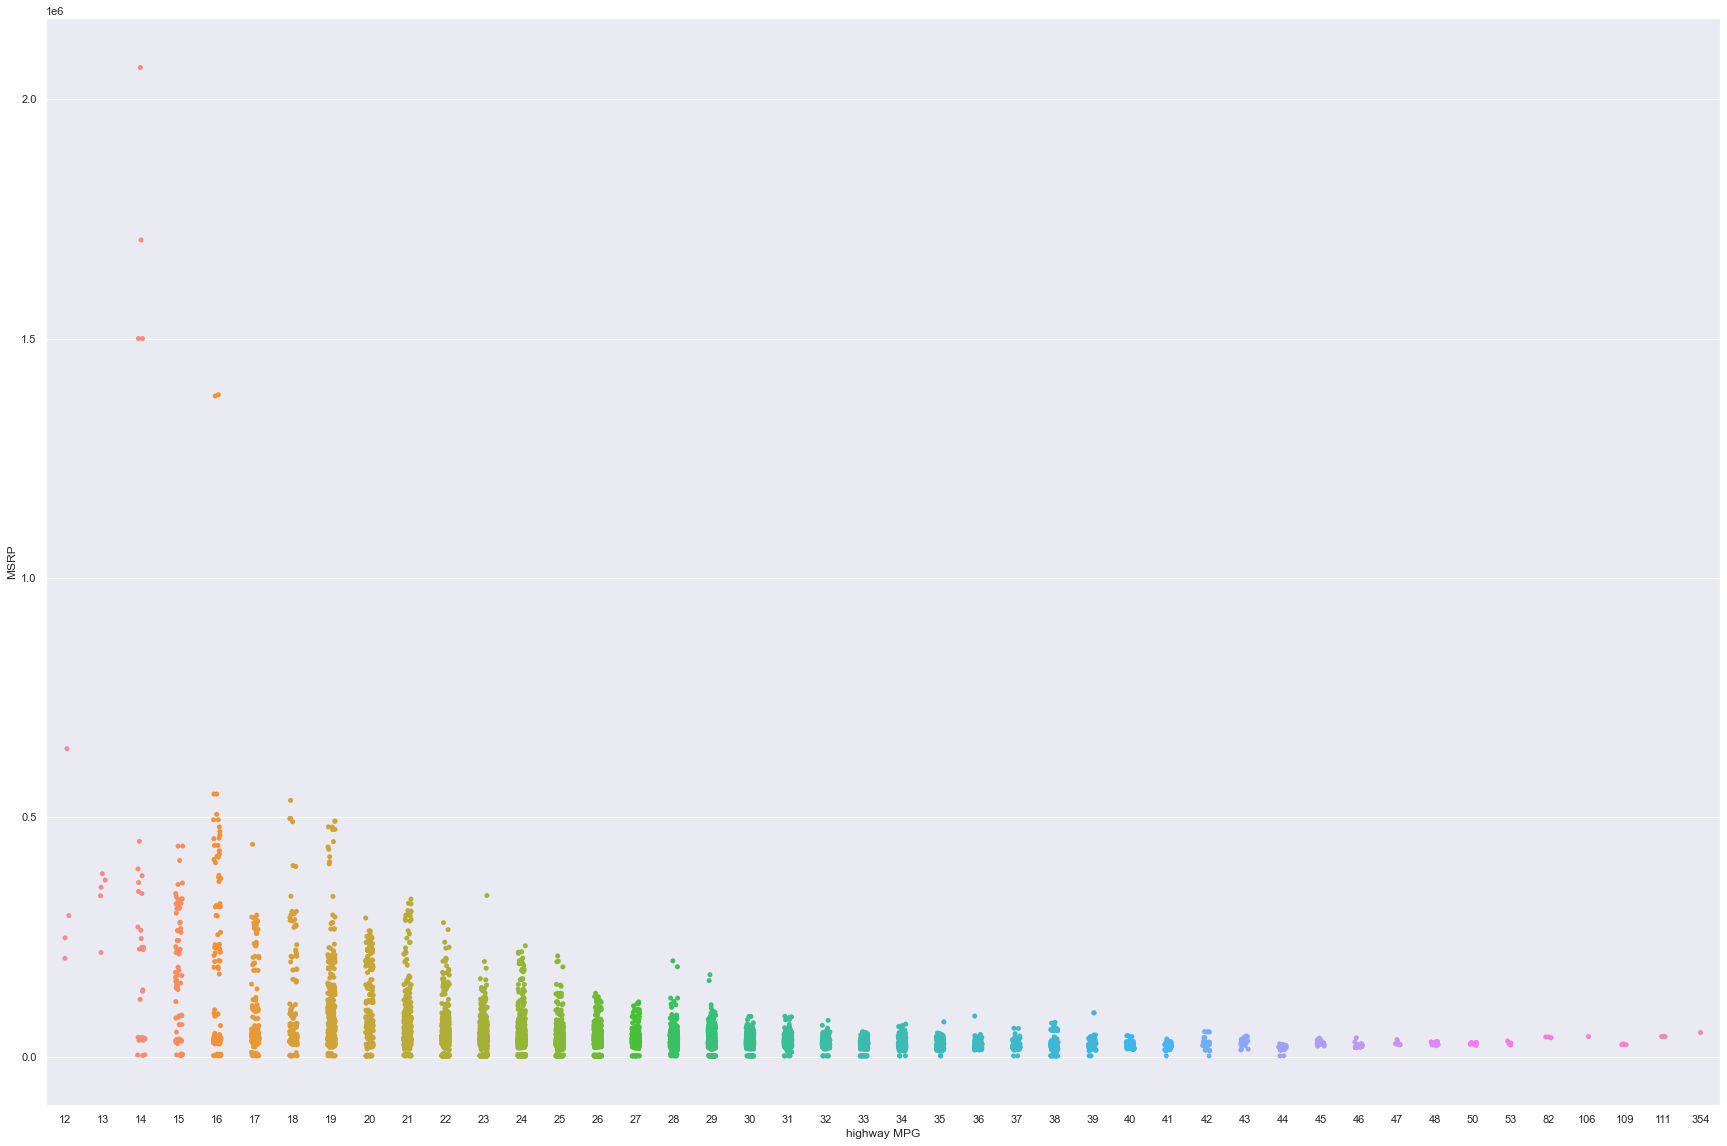

In [152]:
var = 'highway MPG'
fig, ax = plt.subplots()
fig.set_size_inches(30,20)
sns.stripplot(x = var, y ='MSRP', data = cars)

*As we discussed in problem statemenet the high gasoline price is one of parameter ,that losses interest among the customers .So high mileage cars will cost more gasoline expenses .It can directly affect the desicion and intrest of customer in buying the cars*

*We can see in graph the high mileage cars have high MSRP.In general high MSRP cars fall into luxury segment(sports car).We can exclude these high MSRP ,because our objective is to create model near to perfection focusing for large customers (middle income 
families)*

<AxesSubplot:xlabel='city mpg', ylabel='MSRP'>

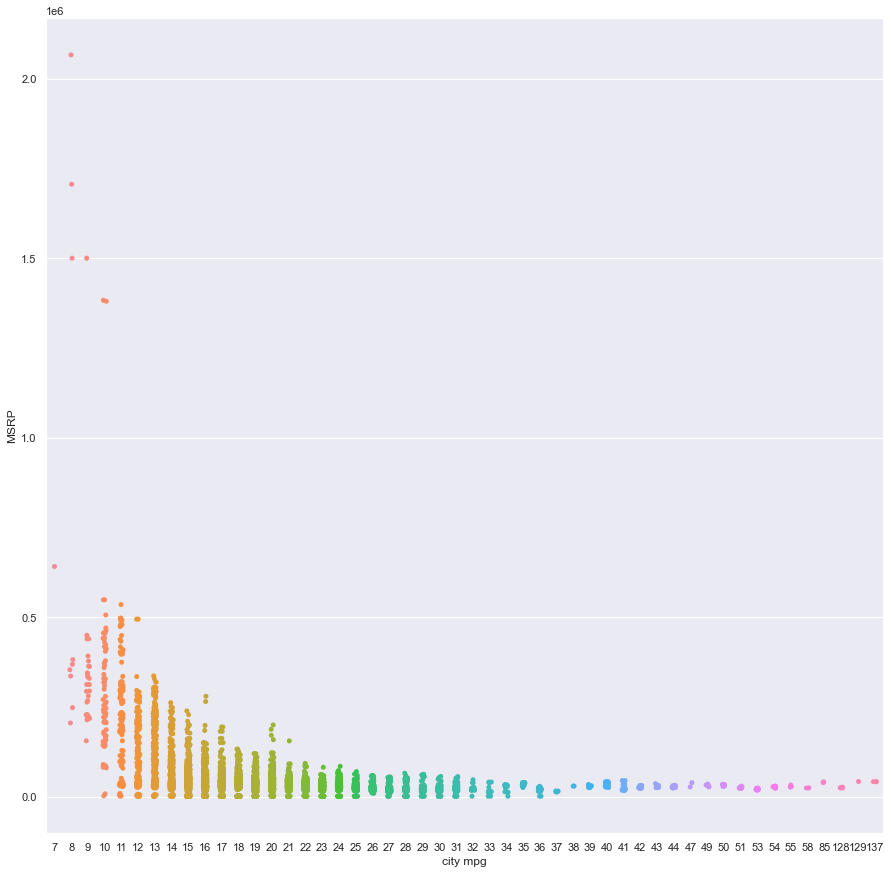

In [153]:
var = 'city mpg'
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.stripplot(x = var, y ='MSRP', data = cars)

<AxesSubplot:xlabel='MSRP'>

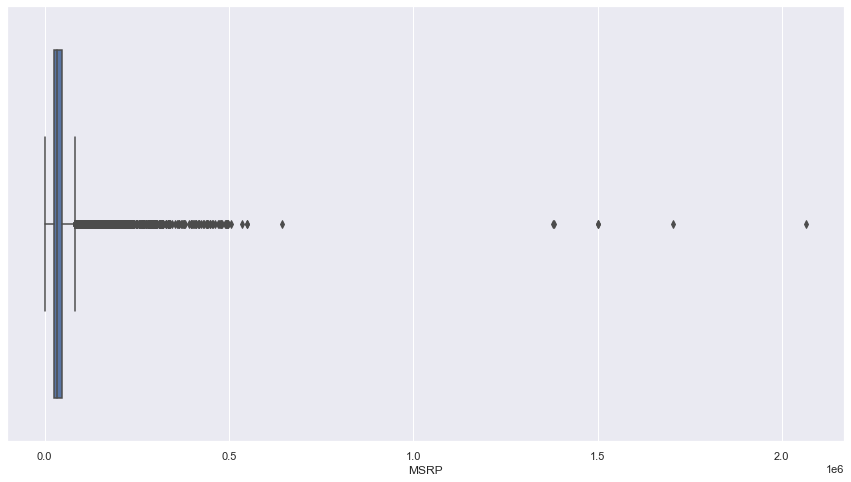

In [154]:
sns.boxplot(x='MSRP',data=cars_temp)                        #Plotting MSRP in box plot,to understand the outliers

In [155]:
cars_temp.sort_values(by='MSRP',ascending=False).iloc[0:10,:]   #As we concluded from above steps , we can exclude the high MSRP
                                                                #data points.We sorted the MSRP values(high-low) ,to confirm 
                                                                #graph gave us a correct beheaviour 

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
11362,2008,1001.00,16.00,2.00,14,8,2065902
11364,2009,1001.00,16.00,2.00,14,8,1705769
11363,2008,1001.00,16.00,2.00,14,8,1500000
8486,2008,650.00,12.00,2.00,14,9,1500000
6351,2012,620.00,12.00,4.00,16,10,1382750
6350,2011,620.00,12.00,4.00,16,10,1380000
4024,2003,660.00,12.00,2.00,12,7,643330
1626,2015,720.00,12.00,2.00,16,10,548800
1622,2014,720.00,12.00,2.00,16,10,548800
1629,2016,750.00,12.00,2.00,18,11,535500


In [156]:
cars_temp = cars_temp[cars_temp['MSRP'] <1380000]   #drop the high priced cars , as it is not customer centirc cars mostly 
                                                    #we can remove this high end cars from our analysis 

<AxesSubplot:xlabel='MSRP'>

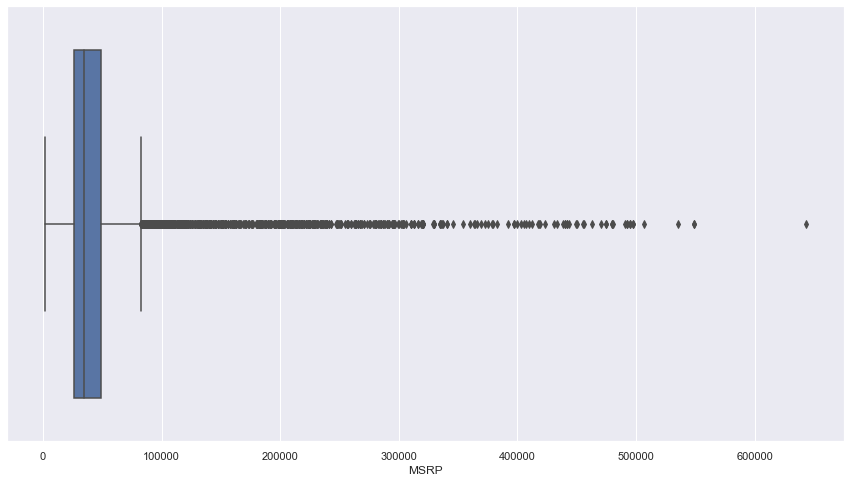

In [157]:
sns.boxplot(x='MSRP',data=cars_temp)

*it is graphically depicting groups of numerical data through their quartiles*
*it can easily help us to identify the different trends among the data*


In [158]:
cars_temp = cars_temp[cars_temp['MSRP'] <=600000]

<AxesSubplot:xlabel='MSRP'>

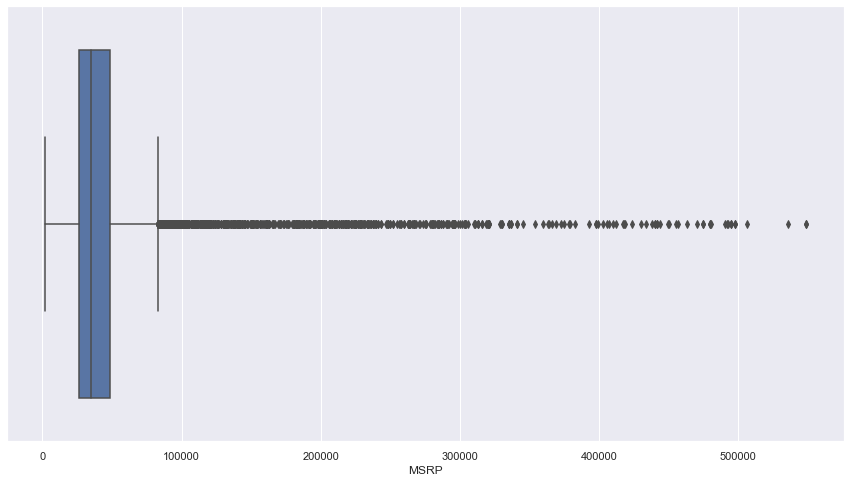

In [159]:
sns.boxplot(x='MSRP',data=cars_temp)

<AxesSubplot:xlabel='MSRP', ylabel='Count'>

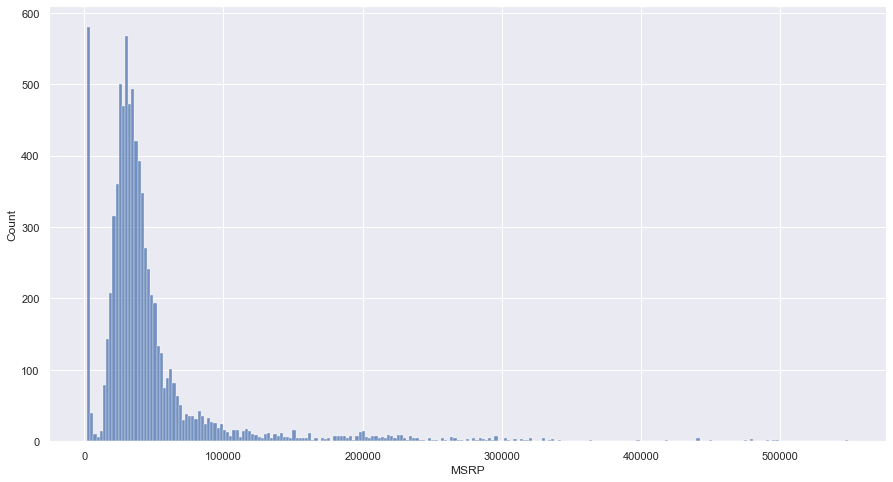

In [160]:
sns.histplot(cars_temp['MSRP'])

In [161]:
pd.DataFrame(dict(mean = cars_temp.mean().round(2),
                  median = cars_temp.median().round(2),
                  std_dev = cars_temp.std().round(2),
                  min_val = cars_temp.min(),
                  max_val = cars_temp.max(),
                  missing_vals = cars_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2012.06,2015.00,6.32,1990.00,2017.00,0
Engine HP,274.19,264.00,113.91,55.00,750.00,0
Engine Cylinders,5.77,6.00,1.87,0.00,12.00,0
Number of Doors,3.41,4.00,0.90,2.00,4.00,0
highway MPG,26.66,26.00,7.72,12.00,354.00,0
city mpg,19.56,18.00,7.16,8.00,137.00,0
MSRP,48855.97,35000.00,55661.38,2000.00,548800.00,0


<AxesSubplot:xlabel='MSRP'>

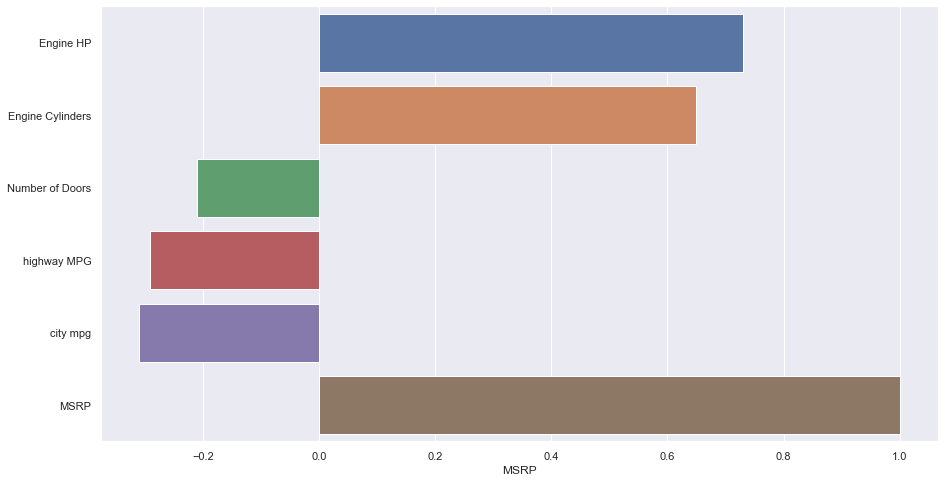

In [162]:
# Lets grab the correlations between our target variable and the remaining numerical features
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing

a = cars_temp[numerical_vars].corr()[['MSRP']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.MSRP[1:],y=a.index[1:],data=a, orient='h')

*Conlusion from above correlation between numerical features and MSRP 

>>Numerical features  
>>> * Engine HP             (+)
>>> * Engine Cylinders      (+)
>>> * Number of Doors       (-)
>>> * highway MPG           (-)
>>> * city mpg              (-)


In [163]:
cars_temp[['Engine HP','Engine Cylinders','Number of Doors',
    'highway MPG','city mpg']].corr().round(2)

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg
Engine HP,1.00,0.81,-0.19,-0.47,-0.51
Engine Cylinders,0.81,1.00,-0.18,-0.60,-0.62
Number of Doors,-0.19,-0.18,1.00,0.10,0.14
highway MPG,-0.47,-0.60,0.10,1.00,0.82
city mpg,-0.51,-0.62,0.14,0.82,1.00


In [164]:
pd.DataFrame(dict(mean = cars_temp.mean().round(2),
                  median = cars_temp.median().round(2),
                  std_dev = cars_temp.std().round(2),
                  min_val = cars_temp.min(),
                  max_val = cars_temp.max(),
                  missing_vals = cars_temp.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
Year,2012.06,2015.00,6.32,1990.00,2017.00,0
Engine HP,274.19,264.00,113.91,55.00,750.00,0
Engine Cylinders,5.77,6.00,1.87,0.00,12.00,0
Number of Doors,3.41,4.00,0.90,2.00,4.00,0
highway MPG,26.66,26.00,7.72,12.00,354.00,0
city mpg,19.56,18.00,7.16,8.00,137.00,0
MSRP,48855.97,35000.00,55661.38,2000.00,548800.00,0



**Categorical Variables** <a class="anchor" id="feature-categorical"></a>

>Let's take a close look at our list of categorical variables and get these cleaned up and ready for modeling

>>**Objective**
>>* Dropped numerical vars that were not highly correlated with price<br>
>>* Dropped useless categorical variables<br>


>[Go to Data Prep Outline](#data-prep)


In [165]:
cars.head()          #viewing our datasets 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Luxury,Compact,Convertible,28,18,34500


In [166]:
categorical = ['object']

cars_cat = pd.merge(cars_temp['MSRP'],cars.select_dtypes(include=categorical),left_index=True,right_index=True)

X=cars_cat

# Compute average target values for all categorical alternatives
target_by_cats(X)

,mean,diff
Make,,
Acura,34887.59,-13968.38
Alfa Romeo,61600.00,12744.03
Aston Martin,197910.38,149054.41
Audi,53452.11,4596.14
BMW,61546.76,12690.79
Bentley,247169.32,198313.35
Buick,33770.40,-15085.57
Cadillac,56231.32,7375.35
Chevrolet,35833.28,-13022.69


,mean,diff
Model,,
1 Series,37853.12,-11002.85
1 Series M,46135.00,-2720.97
100,2000.00,-46855.97
124 Spider,26895.00,-21960.97
190-Class,2000.00,-46855.97
...,...,...
iM,18830.00,-30025.97
iQ,16168.75,-32687.22
tC,21546.43,-27309.54


,mean,diff
Engine Fuel Type,,
diesel,40729.10,-8126.87
electric,34511.92,-14344.05
flex-fuel (premium unleaded recommended/E85),48641.92,-214.05
flex-fuel (premium unleaded required/E85),159429.35,110573.38
flex-fuel (unleaded/E85),36480.99,-12374.98
premium unleaded (recommended),41103.34,-7752.63
premium unleaded (required),98036.24,49180.27
regular unleaded,26366.41,-22489.56


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,89479.81,40623.84
AUTOMATIC,47758.78,-1097.19
DIRECT_DRIVE,33620.00,-15235.97
MANUAL,38290.88,-10565.09
UNKNOWN,8096.67,-40759.30


,mean,diff
Driven_Wheels,,
all wheel drive,58038.31,9182.34
four wheel drive,48573.91,-282.06
front wheel drive,25660.84,-23195.13
rear wheel drive,68531.64,19675.67


,mean,diff
Market Category,,
Crossover,30022.82,-18833.15
"Crossover,Diesel",54622.14,5766.17
"Crossover,Exotic,Luxury,High-Performance",83000.00,34144.03
"Crossover,Exotic,Luxury,Performance",72000.00,23144.03
"Crossover,Factory Tuner,Luxury,High-Performance",91916.15,43060.18
...,...,...
"Luxury,Hybrid",56043.85,7187.88
"Luxury,Performance",46596.04,-2259.93
"Luxury,Performance,Hybrid",66921.82,18065.85


,mean,diff
Vehicle Size,,
Compact,41812.56,-7043.41
Large,65976.96,17120.99
Midsize,45590.58,-3265.39


,mean,diff
Vehicle Style,,
2dr Hatchback,16778.65,-32077.32
2dr SUV,34941.36,-13914.61
4dr Hatchback,22086.30,-26769.67
4dr SUV,42420.48,-6435.49
Cargo Minivan,22964.00,-25891.97
Cargo Van,30724.71,-18131.26
Convertible,91615.28,42759.31
Convertible SUV,46134.33,-2721.64
Coupe,86660.06,37804.09


In [167]:
cars_cat.head()

,MSRP,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,46135,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,40650,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,36350,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,29450,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,34500,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


In [168]:
# How many unique values

print ("The Manufacturing company :" , cars_cat['Make'].unique())

The Manufacturing company : ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'McLaren' 'Maybach' 'Porsche'
 'Toyota' 'Saab' 'GMC' 'Hyundai' 'Honda' 'Cadillac' 'Bentley' 'Ford'
 'Oldsmobile' 'Chevrolet' 'Dodge' 'Lamborghini' 'Lincoln' 'Pontiac'
 'Subaru' 'Volkswagen' 'Spyker' 'Kia' 'Acura' 'Plymouth' 'Rolls-Royce'
 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover' 'Lotus' 'Buick' 'Infiniti'
 'Scion' 'Genesis' 'Suzuki' 'HUMMER']


<Figure size 1440x720 with 0 Axes>

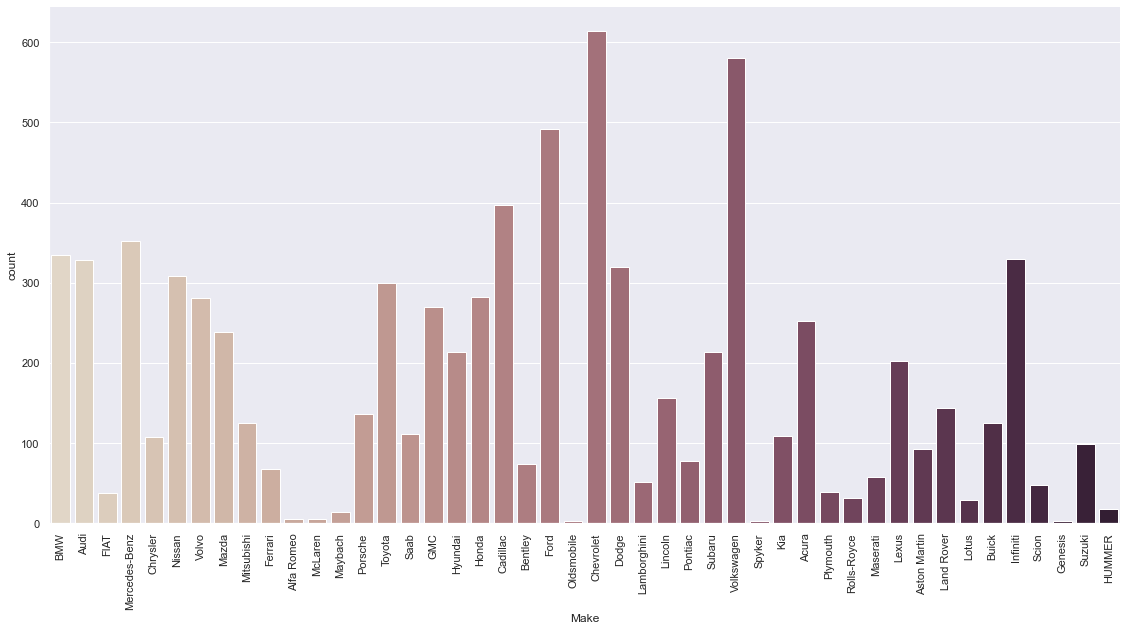

In [169]:
# plotting which company has more cars selling , it seems chevrolet sells more  

var_M = 'Make'
plt.figure(figsize=(20, 10))
sns.catplot(x=var_M, kind="count", palette="ch:.25", height=8, aspect=2, data=cars_cat);
plt.xticks(rotation=90);

*This is a very simple graph representation that of selling units of different brand. this can be use anytime to get an comparsion overview of different parametes over other.*

In [170]:
global_mean = cars_cat['MSRP'].mean()

for col in cars_cat.columns[1:]:
    cars_group = cars_cat.groupby(by=col).MSRP.agg(['mean']).round(2)
    cars_group['diff'] = (cars_group['mean'] - global_mean).round(2)
    display(cars_group)

,mean,diff
Make,,
Acura,34887.59,-13968.38
Alfa Romeo,61600.00,12744.03
Aston Martin,197910.38,149054.41
Audi,53452.11,4596.14
BMW,61546.76,12690.79
Bentley,247169.32,198313.35
Buick,33770.40,-15085.57
Cadillac,56231.32,7375.35
Chevrolet,35833.28,-13022.69


,mean,diff
Model,,
1 Series,37853.12,-11002.85
1 Series M,46135.00,-2720.97
100,2000.00,-46855.97
124 Spider,26895.00,-21960.97
190-Class,2000.00,-46855.97
...,...,...
iM,18830.00,-30025.97
iQ,16168.75,-32687.22
tC,21546.43,-27309.54


,mean,diff
Engine Fuel Type,,
diesel,40729.10,-8126.87
electric,34511.92,-14344.05
flex-fuel (premium unleaded recommended/E85),48641.92,-214.05
flex-fuel (premium unleaded required/E85),159429.35,110573.38
flex-fuel (unleaded/E85),36480.99,-12374.98
premium unleaded (recommended),41103.34,-7752.63
premium unleaded (required),98036.24,49180.27
regular unleaded,26366.41,-22489.56


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,89479.81,40623.84
AUTOMATIC,47758.78,-1097.19
DIRECT_DRIVE,33620.00,-15235.97
MANUAL,38290.88,-10565.09
UNKNOWN,8096.67,-40759.30


,mean,diff
Driven_Wheels,,
all wheel drive,58038.31,9182.34
four wheel drive,48573.91,-282.06
front wheel drive,25660.84,-23195.13
rear wheel drive,68531.64,19675.67


,mean,diff
Market Category,,
Crossover,30022.82,-18833.15
"Crossover,Diesel",54622.14,5766.17
"Crossover,Exotic,Luxury,High-Performance",83000.00,34144.03
"Crossover,Exotic,Luxury,Performance",72000.00,23144.03
"Crossover,Factory Tuner,Luxury,High-Performance",91916.15,43060.18
...,...,...
"Luxury,Hybrid",56043.85,7187.88
"Luxury,Performance",46596.04,-2259.93
"Luxury,Performance,Hybrid",66921.82,18065.85


,mean,diff
Vehicle Size,,
Compact,41812.56,-7043.41
Large,65976.96,17120.99
Midsize,45590.58,-3265.39


,mean,diff
Vehicle Style,,
2dr Hatchback,16778.65,-32077.32
2dr SUV,34941.36,-13914.61
4dr Hatchback,22086.30,-26769.67
4dr SUV,42420.48,-6435.49
Cargo Minivan,22964.00,-25891.97
Cargo Van,30724.71,-18131.26
Convertible,91615.28,42759.31
Convertible SUV,46134.33,-2721.64
Coupe,86660.06,37804.09


In [171]:
cars_cat= cars_cat.drop(['Model'], axis=1) # dropping model column , as price as per model wont be that significant
                                           # in price prediction 

cars_cat= cars_cat.drop(['Make'], axis=1) 
#make feature can help us to decide which car is more sold out ,but it wont helps in deciding the price prediction. 
#The Price would normally be decided on features,mileage the car has.
#Comparing the prices with brand , will make our prediction model work only for those particular brand and there prices offer.
#As a customer or Manfacturer who plans to buy/sell or expand buisness to other region would need prediction model on generic
#fetaures and on other hand it can help customers to get an estimate price on features they want in there car.
#After getting estimated prices, customer can decide the brand they want(therefore it becomes a least parameter in the model)
        
cars_cat= cars_cat.drop(['Market Category'], axis=1)

**Feature Transformation** <a class="anchor" id="feature-transformation"></a>


>**Finally - let's convert categorical vars to numerical indicators**


In [172]:
cars_cat

,MSRP,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,46135,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,40650,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,36350,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,29450,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,34500,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...
11909,46120,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,56670,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,50620,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,50920,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [173]:
cars_temp['ln_MSRP']= np.log1p(cars_temp['MSRP'])

cat_vars = ['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']

for var in cat_vars:
    cars_cat[var] = cars_cat[var].astype("category")

cars_cat= pd.get_dummies(cars_cat,columns=cat_vars, prefix_sep='_')

In [174]:
cars_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8077 entries, 0 to 11913
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   MSRP                                                           8077 non-null   int64
 1   Engine Fuel Type_diesel                                        8077 non-null   uint8
 2   Engine Fuel Type_electric                                      8077 non-null   uint8
 3   Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)  8077 non-null   uint8
 4   Engine Fuel Type_flex-fuel (premium unleaded required/E85)     8077 non-null   uint8
 5   Engine Fuel Type_flex-fuel (unleaded/E85)                      8077 non-null   uint8
 6   Engine Fuel Type_premium unleaded (recommended)                8077 non-null   uint8
 7   Engine Fuel Type_premium unleaded (required)                   8077 non-null 

In [175]:
cars_cat


,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,46135,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,40650,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,36350,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,29450,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,34500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,46120,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11910,56670,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11911,50620,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11912,50920,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Prepare the final data 

*Merging of data sets Numerical variables and categorical variable after cleansing the unwanted feature from data sets.*


In [176]:
cars_final= pd.concat([cars_temp,cars_cat],axis=1)

In [177]:
cars_final.head()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,ln_MSRP,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.00,6.00,2.00,26,19,46135,10.74,46135,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2011,300.00,6.00,2.00,28,19,40650,10.61,40650,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2011,300.00,6.00,2.00,28,20,36350,10.50,36350,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2011,230.00,6.00,2.00,28,18,29450,10.29,29450,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2011,230.00,6.00,2.00,28,18,34500,10.45,34500,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [178]:
cars_final.shape

(8077, 45)

In [179]:
cars_final = cars_final.loc[:,~cars_final.T.duplicated(keep='first')]  #deleting two MSRP columns that got repeated from 
                                                                       #Numerical variable and categorical variable 

In [180]:
cars_final      # final data set looks okay !! now ! Let start creating the model

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,ln_MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.00,6.00,2.00,26,19,46135,10.74,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2011,300.00,6.00,2.00,28,19,40650,10.61,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2011,300.00,6.00,2.00,28,20,36350,10.50,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2011,230.00,6.00,2.00,28,18,29450,10.29,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2011,230.00,6.00,2.00,28,18,34500,10.45,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.00,6.00,4.00,23,16,46120,10.74,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11910,2012,300.00,6.00,4.00,23,16,56670,10.95,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11911,2012,300.00,6.00,4.00,23,16,50620,10.83,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11912,2013,300.00,6.00,4.00,23,16,50920,10.84,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


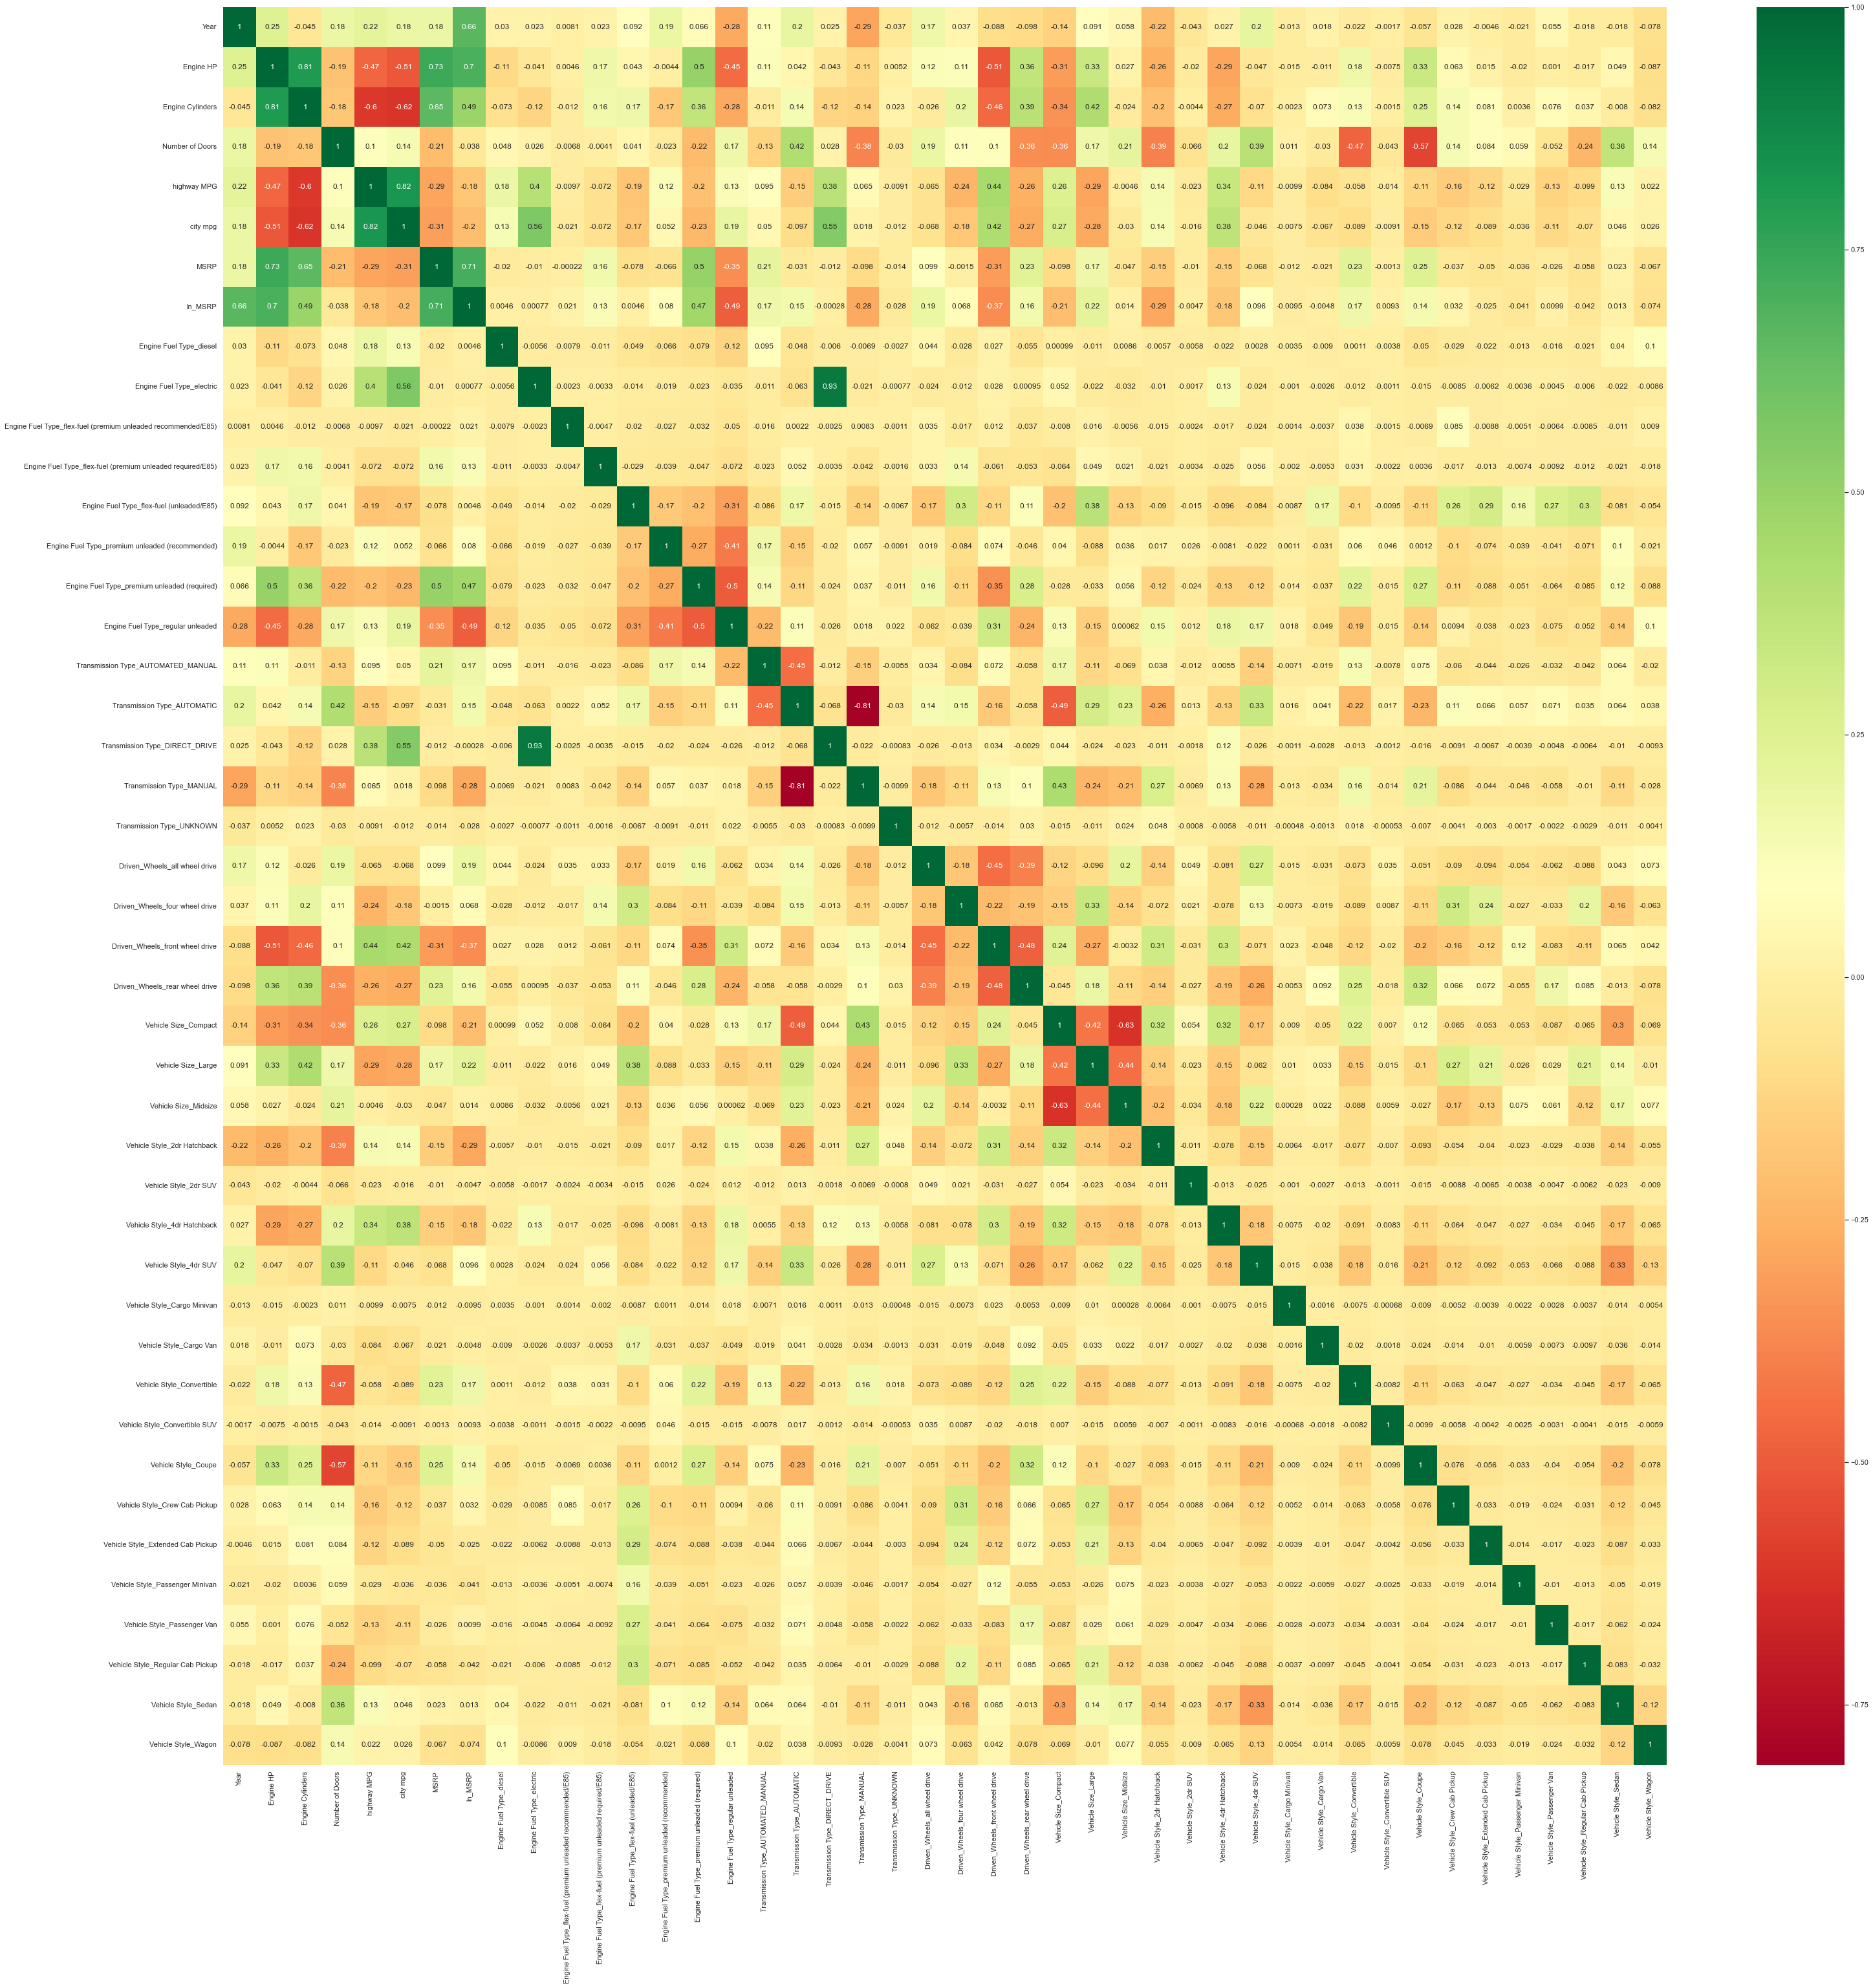

In [181]:
plt.figure(figsize=(50,50))
sns.heatmap(cars_final.corr(),annot=True,cmap='RdYlGn')

plt.show()

*Heat map plot between all the feature we have selected after cleaning the data(numeric data ,categorical data )*
*This plot is a very good represenation and helpful to understand and visualiza the data ,that would also helpful in out upcoming challenges*
>- shows magnitude of a phenomenon as color in two dimensions
>- understand sectoral performance in the market

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [182]:
predictors = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'Vehicle Style_2dr Hatchback', 'Vehicle Style_2dr SUV',
       'Vehicle Style_4dr Hatchback', 'Vehicle Style_4dr SUV',
       'Vehicle Style_Cargo Minivan', 'Vehicle Style_Cargo Van',
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon']

target = ['ln_MSRP']

X = cars_final[predictors]
y = cars_final[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

## 4. Machine Learning model<a class="anchor" id="ml-model"></a>


- [X] [Model1](#first-model)
- [X] [Model2](#second-model)
- [X] [Model3](#third-model)


* [Go to Top](#table-of-content)

*So below Model are based on regression Analysis.But the point that should come in our mind is* **how regression analysis would help us ?**

>>Regression analysis would help us to define the relationship between depenedent variable and Independent variable (here its MSRP)

>> * For example  Y=MX+B ,So every single unit increase in X variable , The Y variable increases by Coefficient
>> * A positive variable coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.
>> * A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>**Instructions:**<br>
>Simple linear regression model:
>- For this first model - we have used one numerical predictor variable - I choose 'Engine HP'
>- this variable had the highest correlation with MSRP 
>- Evaluate MAPE ,R2,Adj-R2,MAE,SSE

In [183]:
simple_var = ['Engine HP']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

         Train    Test
R2        0.49    0.49
Adj-R2    0.49    0.49
MAE       0.43    0.44
MAPE      4.60    4.70
SSE    2650.81 1157.66


In [184]:
round((math.exp(model.coef_[0])-1)*100,2)

0.6

### Observation 

* Mape Value (train) =4.60
* Mape Value (test)  =4.70
* There is no eveidence of over fitting in the above model , as we can see the data performed on train model has little variance   over Test data model.As we observe the following parameters (R2,MAPE) both in Train and Test Model . We found small change in   Test Model.
* However there is no perfect answer or excat value to decide the graph , but observation between Train and Test model 
  answers our question over fitting.
* Coefficient =0.6 
* Coefficient 0.6 signify that every increase Engine HP , would increase the price 0.6 percent 

> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>**Instructions:**<br>
>Regression model with TWO predictors: one numeric,one categorical:
>- For numeric predictor we have selected Engine HP
>- For categorical variable we have selected Transmission Type_AUTOMATED_MANUAL


In [185]:
simple_var2 = ['Engine HP','Transmission Type_AUTOMATED_MANUAL']

model2 = LinearRegression()
model2.fit(X_train[simple_var2],y_train)

# Display Output
train_test_metrics(X_train[simple_var2],X_test[simple_var2],y_train,y_test,model2)

         Train    Test
R2        0.50    0.50
Adj-R2    0.50    0.50
MAE       0.43    0.44
MAPE      4.60    4.70
SSE    2604.62 1139.56


In [186]:
print('Engine HP:', round((math.exp(model2.coef_[0][0])-1)*100,2))
print('Transmission Type_AUTOMATED_MANUAL', round((math.exp(model2.coef_[0][1])-1)*100,2))

Engine HP: 0.59
Transmission Type_AUTOMATED_MANUAL 41.28


### Observation  

* Mape Value (train) =4.60
* Mape Value (test)  =4.70
* There is no eveidence of over fitting in the above model , as we can see the data performed on train model has little variance   over Test data model and MAPE,R2 Value in Test data and Train data are close.So the model performed well in test
  data and train data
* Coefficient Engine HP =0.59 
* Coefficient Transmission Type_AUTOMATED_MANUAL 41.28 signify that every increase Engine HP , would increase the price 0.6 percent 

> **Model 3** <a class="anchor" id="third-model"></a>
<br>
>**Instructions:**<br>
>Regression model with multiples features both categorical and numerical
>- So I have selected the multiple features in prediction model
>-Numerical predictors :Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg'
>-Categorical Predictors :Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN'

In [187]:
simple_var3 = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', ]

model3 = LinearRegression()
model3.fit(X_train[simple_var3],y_train)

# Display Output
train_test_metrics(X_train[simple_var3],X_test[simple_var3],y_train,y_test,model3)

        Train   Test
R2       0.81   0.81
Adj-R2   0.81   0.81
MAE      0.31   0.31
MAPE     3.00   3.10
SSE    990.49 429.13


### Observation  

* Mape Value (train) =3.00
* Mape Value (test)  =3.10
* There is no eveidence of over fitting in the above model , as we can see the data performed on train model has little variance   over Test data model 
* Prediction efficiency also increased in Train and Test data model and reduce in MAPE value 
* In addition of multiple predictors , the model worked more accurately 


# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

* [Go to Top](#table-of-content)

In [188]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.8202673611354093
Accuracy on Testing set:  0.8231320702126858


**Are you staisifed with your model??**


>*So the accuracy of Training Set and Testing set came to be 82 percent.Its no suprise we got same accuracy on both the set .
As from three modelfrom above , we got same observation (R2,Adj-R2,MAE,MAPE,SSE).*

>- The model doesnt seems to be that perfect in prediction. we can try out different models for making prediction.
>- Choosing Linear regression models might be blunder as it deals with continuous values.
>- There could be shift in threshold values when new data points are added 
>- Looking at R2 or MSE values wont be enough to decide wheather , linear regression model can be used for prediction 
>- Regression analysis is also restrictive in nature, which fails to deliver the good result.
>- Data sets could have also include more parameters that affects the price (such as tax ,car prices also varies on basis of     state tax /country tax.
>- Other parameter like safety features could have also included in data set , as recently people are more aware about the safety.





**What should be our next Steps?**

>- We could try different model for the prediction , such as Random forest regressor model for better accuracy.
>- We could have added more data in the data sets such as tax,location,waiting period (chip shortage recently ) .
>- We could have tried to understand more on graphs and data relationship , to make more better prediction model 


**what different we could have done**
>- This model can used by customers to predict the prices for new /old cars .
>- There are already prediction model , but it has some lacks in it 
>- By adding more parameters like tax , location we can use it for more better prediction.
>- We could have used the comparison between the past prices in order to help new manufactures in cars indusrty .

**As Suggesstion to leadership** 

>> The Prices could be more in controlled by controlling the other parameters .
>> The blooming industry of car can show huge decline in sells in near future.
>> Recent rise in gasoline has also led decrease the customer incline to purchase cars .
>> The purchase and prediction of cars process can be more fluid, allowing the customer on there finger tip.


![Car prediction ](https://www.vshsolutions.com/wp-content/uploads/2019/03/carprediction.jpeg)
